In [41]:
import dill
dill.load_session('notebook_env.db')

In [42]:
import pandas as pd
data = pd.read_csv('/Users/tamasmakos/dev/k-monitor/cleaned_data.csv')

In [43]:
data.head(2)

Eljárás EKR azonosító                     Ajánlatkérő szervezet neve  \
0       EKR001530432019        Albert Schweitzer Kórház Rendelőintézet   
1       EKR001531082019  Markhot Ferenc Oktatókórház És Rendelőintézet   

  Ajánlatkérő nemzeti azonosítószáma Ajánlatkérő szervezet típusa  \
0                        15813774210             U - Egyéb típus:   
1                        15813839210             U - Egyéb típus:   

  Ajánlatkérő szervezet főtevékenysége        Eljárásrend Eljárás fajtája  \
0                     KL - Egészségügy  Uniós eljárásrend   Nyílt eljárás   
1                     KL - Egészségügy  Uniós eljárásrend   Nyílt eljárás   

                            Eljárás tárgya Szerződés típusa  \
0  Traumatológiai implantátumok beszerzése     Árubeszerzés   
1      Röntgen kontrasztanyagok beszerzése     Árubeszerzés   

   A beszerzés végleges összértéke  ... Hirdetmény közzétételének dátuma  \
0                     110810613.00  ...                       2020-07-23   
1                      52368257.00  ...                       2020-09-27   

  Minőségi kritérium alkalmazásra került  \
0                                    Nem   
1                                    Nem   

  Költség kritérium alkalmazásra került  Ár kritérium alkalmazásra került  \
0                                   Nem                              Igen   
1                                   Nem                              Igen   

          Ajánlatkérő szervezet neve - tisztított Ajánlatkérő Cégtípus  \
0        Albert Schweitzer Kórház Rendelőintézet                   NaN   
1  Markhot Ferenc Oktatókórház És Rendelőintézet                   NaN   

                            Nyertes ajánlattevő neve - tisztított  \
0  Sanatmetal Ortopédiai És Traumatológiai Eszközöket Gyártó Kft.   
1                                               Clear Pharma Zrt.   

  Nyertes Cégtípus unique_id  \
0             Kft.         0   
1             Zrt.         1   

  Hirdetmény és szerződés megkötés között eltelt idő  
0                                            -9 days  
1                                           -10 days  

[2 rows x 30 columns]

In [44]:
# Displaying more characters
pd.set_option('display.max_colwidth', None)
network_data = data[['Eljárás EKR azonosító', 'Ajánlatkérő szervezet neve - tisztított', 'Nyertes ajánlattevő neve - tisztított', 'A beszerzés végleges összértéke', 'Ajánlatkérő szervezet típusa',	'Ajánlatkérő szervezet főtevékenysége', 'Szerződés típusa', 'Teljesítés helye NUTS-kód(ok)', 'Nyertes ajánlattevő kkv', 'Hirdetmény és szerződés megkötés között eltelt idő', 'Hirdetmény közzétételének dátuma']]
# Converting the colm names to english
network_data.columns = ['procurement_id', 'buyer', 'winner', 'price', 'buyer_type', 'buyer_activity', 'contract_type', 'place', 'winner_kkv', 'time_delta', 'published_at']
data = network_data.copy()

In [45]:
# Keeping only the year from the published_at column
data['published_at'] = pd.to_datetime(data['published_at']).dt.year

In [46]:
data.head(2)

procurement_id                                           buyer  \
0  EKR001530432019        Albert Schweitzer Kórház Rendelőintézet    
1  EKR001531082019  Markhot Ferenc Oktatókórház És Rendelőintézet    

                                                           winner  \
0  Sanatmetal Ortopédiai És Traumatológiai Eszközöket Gyártó Kft.   
1                                               Clear Pharma Zrt.   

         price        buyer_type    buyer_activity contract_type  place  \
0 110810613.00  U - Egyéb típus:  KL - Egészségügy  Árubeszerzés  HU312   
1  52368257.00  U - Egyéb típus:  KL - Egészségügy  Árubeszerzés  HU312   

  winner_kkv time_delta  published_at  
0       Igen    -9 days       2020.00  
1       Igen   -10 days       2020.00

In [48]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', None)

variation_counts = data[['published_at', 'buyer_type', 'buyer_activity', 'contract_type', 'winner_kkv', 'place']].value_counts().sort_values(ascending=False)
variation_sums = data.groupby(['published_at','buyer_type', 'buyer_activity', 'contract_type', 'winner_kkv', 'place'])['price'].sum()

variation_counts_with_sums = pd.concat([variation_counts, variation_sums], axis=1)
variation_counts_with_sums.columns = ['Count', 'Sum of Prices']

variation_counts_with_sums


Count  \
published_at buyer_type                                                                                              buyer_activity                   contract_type            winner_kkv place                                                    
2021.00      U - Közjogi intézmény                                                                                   KL - Egyéb tevékenység:          Szolgáltatás megrendelés Igen       HU110                                              505   
2019.00      N - Regionális/helyi szintű                                                                             KL - Általános közszolgáltatások Szolgáltatás megrendelés Nem        HU311                                              482   
2022.00      U - Minisztériumi vagy egyéb nemzeti vagy szövetségi hatóság, valamint regionális vagy helyi részlegeik KL - Egyéb tevékenység:          Szolgáltatás megrendelés Igen       HU                                                 433   
2020.00      U - Egyéb típus:                                                                                        KL - Oktatás                     Árubeszerzés             Igen       HU333                                              423   
2022.00      U - Egyéb típus:                                                                                        KL - Egyéb tevékenység:          Árubeszerzés             Igen       HU                                                 368   
...                                                                                                                                                                                                                                          ...   
                                                                                                                                                      Szolgáltatás megrendelés Igen       HR|NL|IT|FR|DE                                       1   
2019.00      N - Közjogi szervezet                                                                                   KL - Egyéb tevékenység:          Árubeszerzés             Nem        HU321|SK042|SK032|SK022|SK023|RS|RO111|SK031         1   
                                                                                                                                                                                          HU233|HU231|HU223|HU120|HU211|HU332|HU311|HU323      1   
                                                                                                                                                                                          HU233|HU120                                          1   
2020.00      U - Közjogi intézmény                                                                                   KL - Egyéb tevékenység:          Árubeszerzés             Igen       HU323|HU321                                          1   

                                                                                                                                                                                                                                              Sum of Prices  
published_at buyer_type                                                                                              buyer_activity                   contract_type            winner_kkv place                                                              
2021.00      U - Közjogi intézmény                                                                                   KL - Egyéb tevékenység:          Szolgáltatás megrendelés Igen       HU110                                             503629052963.00  
2019.00      N - Regionális/helyi szintű                                                                             KL - Általános közszolgáltatások Szolgáltatás megrendelés Nem        HU311                                              22913761060.00  
2022.00      U - Minisztériumi vagy egyéb nemz

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


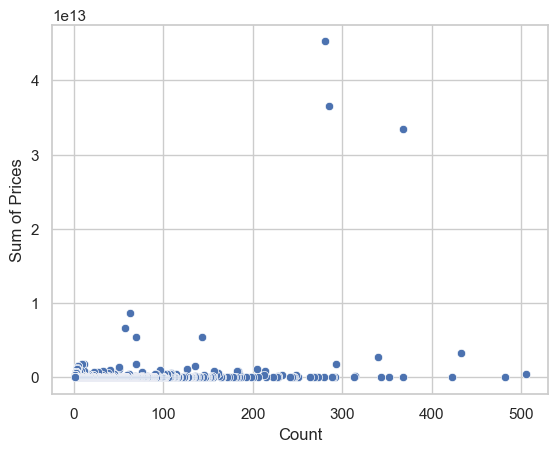

In [49]:
# Discovering the relation between count and sum of prices
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.scatterplot(data=variation_counts_with_sums, x="Count", y="Sum of Prices")
plt.show()

In [52]:
# What are the highest price sums?
# Changing the sum of prices to standard notation instead of scientific
pd.options.display.float_format = '{:.2f}'.format
variation_counts_with_sums.sort_values(by='Sum of Prices', ascending=False).head(10)
# Adding a new column - average price 
variation_counts_with_sums['Average Price'] = variation_counts_with_sums['Sum of Prices'] / variation_counts_with_sums['Count']
variation_counts_with_sums.sort_values(by='Average Price', ascending=False).head(30)

Count  \
published_at buyer_type            buyer_activity          contract_type            winner_kkv place                                                          
2020.00      U - Közjogi intézmény KL - Egyéb tevékenység: Építési beruházás        Nem        HU223|HU221|HU222                                          3   
                                                                                               HU212|HU213|HU120|HU211                                    2   
                                                                                    Igen       HU231|HU233|HU232                                          1   
                                                                                    Nem        HU321|HU322|HU323                                          2   
                                                                                               HU311|HU312|HU313                                          3   
                                                                                               HU332|HU331|HU333                                          2   
                                                                                    Igen       HU212|HU213|HU120|HU211                                    1   
                                                                                               HU321|HU322|HU323                                          2   
                                                                                               HU332|HU331|HU333                                          1   
                                                                                    Nem        HU231|HU233|HU232                                          2   
2021.00      U - Közjogi intézmény KL - Egyéb tevékenység: Építési beruházás        Igen       HU321|HU322|HU323                                          2   
                                                                                    Nem        HU321|HU322|HU323                                          3   
                                                                                               HU331|HU332|HU333                                          3   
                                                                                               HU232|HU231|HU233                                          2   
                                                                                               HU311|HU312|HU313                                          4   
                                                                                               HU223|HU222|HU221                                          5   
                                                                                    Igen       HU232|HU231|HU233                                          1   
                                                                                               HU331|HU332|HU333                                          1   
                                                                                    Nem        HU213|HU120|HU212|HU211                                    5   
             U - Egyéb típus:      KL - Egyéb tevékenység: Szolgáltatás megrendelés Nem        HU323|HU311|HU322|HU331|HU321|HU332|HU333|HU313|HU312      1   
                                                                                               HU213|HU211|HU223|HU212|HU231|HU222|HU221|HU232|HU233      1   
                                                                                               HU120|HU110                                                1   
                                                                                    Igen       HU213|HU223|HU212|HU211|HU221|HU232|HU222|HU233|HU231      9   
                                                                                               HU313|HU312|HU331|HU321|HU333|HU332|HU311|HU322|HU323      9   
                

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


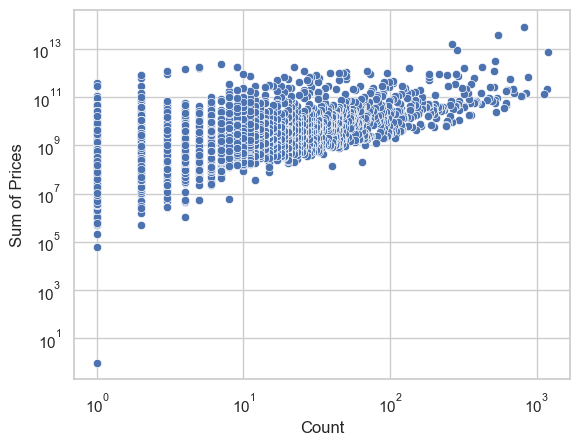

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

scatterplot = sns.scatterplot(data=variation_counts_with_sums, x="Count", y="Sum of Prices")
scatterplot.set(xscale='log', yscale='log')
plt.show()

In [16]:
data['contract_type'].value_counts().sort_values(ascending=False)

contract_type
Árubeszerzés                44668
Szolgáltatás megrendelés    29616
Építési beruházás           24738
Name: count, dtype: int64

In [17]:
subnetwork = create_subnetwork(data, 'contract_type', 'Árubeszerzés')

In [28]:
import networkx as nx
from networkx.algorithms import bipartite, community

def detect_communities_optimized(G):
    # Identifying buyers and winners from the bipartite attribute
    buyers = {n for n, d in G.nodes(data=True) if d.get('bipartite') == 0}
    winners = set(G) - buyers

    # Efficient projection
    buyer_projection = bipartite.weighted_projected_graph(G, buyers)
    winner_projection = bipartite.weighted_projected_graph(G, winners)

    # Faster community detection
    buyer_communities = community.asyn_lpa_communities(buyer_projection, weight='weight')
    winner_communities = community.asyn_lpa_communities(winner_projection, weight='weight')

    # Converting to list of lists
    buyer_communities_list = [list(c) for c in buyer_communities]
    winner_communities_list = [list(c) for c in winner_communities]

    return buyer_communities_list, winner_communities_list


buyer_communities_list, winner_communities_list = detect_communities_optimized(subnetwork)

In [8]:
import plotly.graph_objects as go
import networkx as nx

def create_multilayer_graph_3d_plotly(df, G, buyer_communities_list, winner_communities_list, layer_distance=2):
    # Creating community maps
    buyer_community_map = {node: i for i, comm in enumerate(buyer_communities_list) for node in comm}
    winner_community_map = {node: i for i, comm in enumerate(winner_communities_list) for node in comm}

    # Determining relevant buyers and winners
    winners_in_communities = {node for comm in winner_communities_list for node in comm}
    relevant_buyers = set(df[df['winner'].isin(winners_in_communities)]['buyer'])

    # Create subgraphs for visualization
    subgraph_buyers = G.subgraph(relevant_buyers)
    subgraph_winners = G.subgraph(winners_in_communities)

    # 3D layout for each community
    pos_winners = nx.spring_layout(subgraph_winners, dim=3, seed=42)  # 3D layout for winners
    pos_buyers = nx.spring_layout(subgraph_buyers, dim=3, seed=42)   # 3D layout for buyers

    # Adjust positions to create layers
    pos = {}
    for node, (x, y, z) in pos_winners.items():
        pos[node] = (x, y, z + layer_distance)  # Shift winners up
    for node, (x, y, z) in pos_buyers.items():
        pos[node] = (x, y, z - layer_distance)  # Shift buyers down

    # Trace for the nodes
    node_x, node_y, node_z, node_color, node_text = [], [], [], [], []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        color = 'blue' if node in subgraph_buyers else 'red'
        node_color.append(color)
        node_text.append(f'{node} ({color})')

    node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers', 
                              marker=dict(color=node_color, size=5),
                              text=node_text, hoverinfo='text')

    # Trace for the edges
    edge_x, edge_y, edge_z = [], [], []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', 
                              line=dict(color='black', width=1), hoverinfo='none')

    # Create the 3D plot
    fig = go.Figure(data=[edge_trace, node_trace])
    fig.update_layout(title='3D Multilayer Visualization of Buyers and Winners with Communities',
                      showlegend=False, scene=dict(xaxis_title='X-axis',
                                                   yaxis_title='Y-axis',
                                                   zaxis_title='Z-axis'))
    fig.show()

In [10]:
create_multilayer_graph_3d_plotly(data, subnetwork, buyer_communities_list, winner_communities_list, layer_distance=5)

In [39]:
dill.dump_session('notebook_env.db')